In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [2]:
match_data = pd.read_csv('ContinousDataset.csv')
match_data.head(5)

,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First
1,1,ODI # 2,England,Australia,Winner2ndInning,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First
2,2,ODI # 3,England,Australia,Winner2ndInning,Lord's,"Aug 26, 1972",Australia,England,Home,Away,First,Second
3,3,ODI # 4,England,Australia,Winner2ndInning,Birmingham,"Aug 28, 1972",England,England,Home,Away,Second,First
4,4,ODI # 5,New Zealand,Pakistan,Winner1stInning,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,Home,Away,First,Second


In [3]:
match_data.shape

(7494, 13)

In [5]:
match_data.columns

Index(['Unnamed: 0', 'Scorecard', 'Team 1', 'Team 2', 'Margin', 'Ground',
       'Match Date', 'Winner', 'Host_Country', 'Venue_Team1', 'Venue_Team2',
       'Innings_Team1', 'Innings_Team2'],
      dtype='object')

In [6]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7494 entries, 0 to 7493
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     7494 non-null   int64 
 1   Scorecard      7494 non-null   object
 2   Team 1         7494 non-null   object
 3   Team 2         7494 non-null   object
 4   Margin         7494 non-null   object
 5   Ground         7494 non-null   object
 6   Match Date     7494 non-null   object
 7   Winner         7494 non-null   object
 8   Host_Country   7364 non-null   object
 9   Venue_Team1    7494 non-null   object
 10  Venue_Team2    7494 non-null   object
 11  Innings_Team1  7494 non-null   object
 12  Innings_Team2  7494 non-null   object
dtypes: int64(1), object(12)
memory usage: 761.2+ KB


In [9]:
match_data.describe()

,Unnamed: 0
count,7494.000000
mean,1877.024019
std,1082.905280
min,0.000000
25%,939.250000
50%,1878.000000
75%,2814.750000
max,3750.000000


In [10]:
winner_count = match_data.loc[:,["Winner","Scorecard"]].groupby("Winner").count()
winner_count = winner_count.sort_values("Scorecard",ascending=False)
winner_count

,Scorecard
Winner,
Australia,1104
India,950
Pakistan,932
West Indies,760
Sri Lanka,742
South Africa,722
England,686
New Zealand,648
Zimbabwe,258


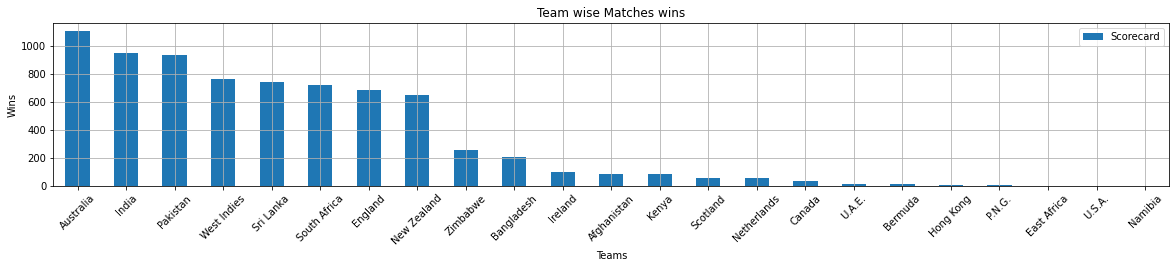

In [11]:
winner_count.iloc[:,0:1].plot(kind="bar",figsize=(20,3))
plt.xticks(rotation=45)
plt.xlabel("Teams")
plt.ylabel("Wins")
plt.title("Team wise Matches wins")
plt.grid()
plt.show()

In [12]:
team_wise_matches_info = pd.DataFrame(columns=["TeamName","MatchesPlayed","MatchesWon",
                                               "WonPercentage","LossPercentage","Total_Home_Played",
                                               "Total_Home_Wins","Home_Wins%","Home_Innings_1st_1st",
                                               "Home_Innings_1st_2nd","Home_Innings_2nd_1st","Home_Innings_2nd_2nd",
                                               "Total_Away_Played","Total_Away_Wins","Away_Wins%",
                                               "Away_Innings_1st_1st","Away_Innings_1st_2nd","Away_Innings_2nd_1st",
                                               "Away_Innings_2nd_2nd"])

In [13]:
def team_statistics(team,i):
    #Calculating the total matches played by a team
    total_matches_played = match_data[(match_data["Team 1"] == team) | (match_data["Team 2"] == team)]
    total_matches_played_rows,total_matches_played_columns = total_matches_played.shape
   
    #Calculating the total matches won by a team
    total_matches_won = match_data[((match_data["Team 1"] == team) | (match_data["Team 2"] == team)) & (match_data["Winner"] == team)]
    total_matches_won_rows, total_matches_won_columns = total_matches_won.shape
    
    #Calculating the total matches played by a team at Home Country
    total_home_played = match_data[((match_data["Team 1"] == team) | (match_data["Team 2"] == team)) & (match_data["Host_Country"] == team)]
    total_home_played_rows, total_home_played_columns = total_home_played.shape
    
    #Calculating the total matches won by a team at Home Country
    team_home_won = match_data[((match_data["Team 1"] == team) | (match_data["Team 2"] == team)) & (match_data["Winner"] == team) & (match_data["Host_Country"] == team)]
    team_home_won_rows,team_home_won_columns = team_home_won.shape
    
    #Calculating the total matches won by a team1 in First Innings at Home Country 
    team_home_innings1_1st_country_won = match_data[(match_data["Team 1"] == team) & (match_data["Winner"] == team) & (match_data["Host_Country"] == team) & (match_data["Innings_Team1"] == "First")]
    team_home_innings1_1st_country_won_rows,team_home_innings1_1st_country_won_columns = team_home_innings1_1st_country_won.shape
    
    #Calculating the total matches won by a team1 in Second Innings at Home Country 
    team_home_innings1_2nd_country_won = match_data[(match_data["Team 1"] == team) & (match_data["Winner"] == team) & (match_data["Host_Country"] == team) & (match_data["Innings_Team1"] == "Second")]
    team_home_innings1_2nd_country_won_rows,team_home_innings1_2nd_country_won_columns = team_home_innings1_2nd_country_won.shape
  
    #Calculating the total matches won by a team2 in First Innings at Home Country 
    team_home_innings2_1st_country_won = match_data[(match_data["Team 2"] == team) & (match_data["Winner"] == team) & (match_data["Host_Country"] == team) & (match_data["Innings_Team2"] == "First")]
    team_home_innings2_1st_country_won_rows,team_home_innings2_1st_country_won_columns = team_home_innings2_1st_country_won.shape
    
    #Calculating the total matches won by a team2 in Second Innings at Home Country 
    team_home_innings2_2nd_country_won = match_data[(match_data["Team 2"] == team) & (match_data["Winner"] == team) & (match_data["Host_Country"] == team) & (match_data["Innings_Team2"] == "Second")]
    team_home_innings2_2nd_country_won_rows,team_home_innings2_2nd_country_won_columns = team_home_innings2_2nd_country_won.shape
   
    #Calculating the total matches played by a team at Away Country
    total_away_played = match_data[((match_data["Team 1"] == team) | (match_data["Team 2"] == team)) & (match_data["Host_Country"] != team)]
    total_away_played_rows, total_away_played_columns = total_away_played.shape
    
    #Calculating the total matches won by a team at Away Country
    team_away_won = match_data[((match_data["Team 1"] == team) | (match_data["Team 2"] == team)) & (match_data["Winner"] == team) & (match_data["Host_Country"] != team)]
    team_away_won_rows,team_away_won_columns = team_away_won.shape
    
    #Calculating the total matches won by a team1 in First Innings at Away Country
    team_away_innings1_1st_country_won = match_data[(match_data["Team 1"] == team) & (match_data["Winner"] == team) & (match_data["Host_Country"] != team) & (match_data["Innings_Team1"] == "First")]
    team_away_innings1_1st_country_won_rows,team_away_innings1_1st_country_won_columns = team_away_innings1_1st_country_won.shape
    
    #Calculating the total matches won by a team1 in Second Innings at Away Country 
    team_away_innings1_2nd_country_won = match_data[(match_data["Team 1"] == team) & (match_data["Winner"] == team) & (match_data["Host_Country"] != team) & (match_data["Innings_Team1"] == "Second")]
    team_away_innings1_2nd_country_won_rows,team_away_innings1_2nd_country_won_columns = team_away_innings1_2nd_country_won.shape
    
    #Calculating the total matches won by a team2 in First Innings at Away Country 
    team_away_innings2_1st_country_won = match_data[(match_data["Team 2"] == team) & (match_data["Winner"] == team) & (match_data["Host_Country"] != team) & (match_data["Innings_Team2"] == "First")]
    team_away_innings2_1st_country_won_rows,team_away_innings2_1st_country_won_columns = team_away_innings2_1st_country_won.shape
    
    #Calculating the total matches won by a team2 in Second Innings at Away Country 
    team_away_innings2_2nd_country_won = match_data[(match_data["Team 2"] == team) & (match_data["Winner"] == team) & (match_data["Host_Country"] != team) & (match_data["Innings_Team2"] == "Second")]
    team_away_innings2_2nd_country_won_rows,team_away_innings2_2nd_country_won_columns = team_away_innings2_2nd_country_won.shape
        
    team_wise_matches_info.at[i,"TeamName"] = team
    team_wise_matches_info.at[i,"MatchesPlayed"] = total_matches_played_rows
    team_wise_matches_info.at[i,"MatchesWon"] = total_matches_won_rows
    team_wise_matches_info.at[i,"WonPercentage"] = round(total_matches_won_rows*100/total_matches_played_rows,2)
    team_wise_matches_info.at[i,"LossPercentage"] = 100-round(total_matches_won_rows*100/total_matches_played_rows,2)
    team_wise_matches_info.at[i,"Total_Home_Played"] = total_home_played_rows
    team_wise_matches_info.at[i,"Total_Home_Wins"] = team_home_won_rows
    team_wise_matches_info.at[i,"Home_Innings_1st_1st"] = team_home_innings1_1st_country_won_rows
    team_wise_matches_info.at[i,"Home_Innings_1st_2nd"] = team_home_innings1_2nd_country_won_rows
    team_wise_matches_info.at[i,"Home_Innings_2nd_1st"] = team_home_innings2_1st_country_won_rows
    team_wise_matches_info.at[i,"Home_Innings_2nd_2nd"] = team_home_innings2_2nd_country_won_rows
    team_wise_matches_info.at[i,"Total_Away_Played"] = total_away_played_rows
    team_wise_matches_info.at[i,"Total_Away_Wins"] = team_away_won_rows
    team_wise_matches_info.at[i,"Away_Innings_1st_1st"] = team_away_innings1_1st_country_won_rows
    team_wise_matches_info.at[i,"Away_Innings_1st_2nd"] = team_away_innings1_2nd_country_won_rows
    team_wise_matches_info.at[i,"Away_Innings_2nd_1st"] = team_away_innings2_1st_country_won_rows
    team_wise_matches_info.at[i,"Away_Innings_2nd_2nd"] = team_away_innings2_2nd_country_won_rows
    
    if total_home_played_rows > 0:
         team_wise_matches_info.at[i,"Home_Wins%"] = round(team_home_won_rows*100/total_home_played_rows,2)
    else :
         team_wise_matches_info.at[i,"Home_Wins%"] = 0
            
    if total_away_played_rows > 0:
         team_wise_matches_info.at[i,"Away_Wins%"] = round(team_away_won_rows*100/total_away_played_rows,2)
    else :
         team_wise_matches_info.at[i,"Away_Wins%"] = 0

In [15]:
unique_teams = match_data["Winner"].unique()
print(unique_teams)

['Australia' 'England' 'New Zealand' 'West Indies' 'Pakistan' 'India'
 'Sri Lanka' 'Zimbabwe' 'South Africa' 'Kenya' 'U.A.E.' 'Bangladesh'
 'Canada' 'Netherlands' 'Bermuda' 'Ireland' 'Scotland' 'Afghanistan'
 'P.N.G.' 'Hong Kong' 'Namibia' 'U.S.A.' 'East Africa']


In [16]:
i=0

for team in unique_teams:
    data = team_statistics(team,i)
    i=i+1 

In [17]:
team_wise_matches_info = team_wise_matches_info.sort_values(["MatchesPlayed","MatchesWon"],ascending=False)
team_wise_matches_info.head()

,TeamName,MatchesPlayed,MatchesWon,WonPercentage,LossPercentage,Total_Home_Played,Total_Home_Wins,Home_Wins%,Home_Innings_1st_1st,Home_Innings_1st_2nd,Home_Innings_2nd_1st,Home_Innings_2nd_2nd,Total_Away_Played,Total_Away_Wins,Away_Wins%,Away_Innings_1st_1st,Away_Innings_1st_2nd,Away_Innings_2nd_1st,Away_Innings_2nd_2nd
5,India,1760,950,53.98,46.02,590,358,60.68,78,101,78,101,1170,592,50.6,132,164,132,164
0,Australia,1718,1104,64.26,35.74,818,548,66.99,159,115,159,115,900,556,61.78,150,128,150,128
4,Pakistan,1708,932,54.57,45.43,330,202,61.21,49,52,49,52,1378,730,52.98,202,163,202,163
6,Sri Lanka,1532,742,48.43,51.57,422,274,64.93,63,74,63,74,1110,468,42.16,128,106,128,106
3,West Indies,1462,760,51.98,48.02,460,258,56.09,50,79,50,79,1002,502,50.1,116,135,116,135


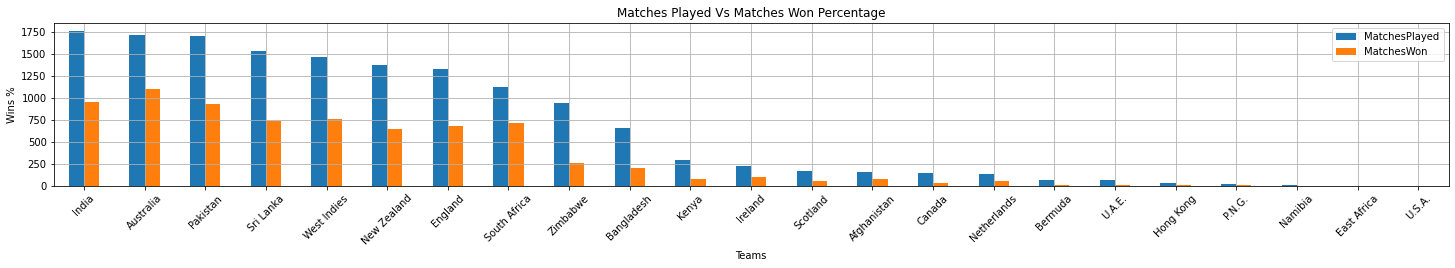

In [18]:
team_wise_matches_info.iloc[:,0:3].plot(kind="bar",x="TeamName",figsize=(25,3))
plt.xticks(rotation=45)
plt.xlabel("Teams")
plt.ylabel("Wins %")
plt.title("Matches Played Vs Matches Won Percentage")
plt.grid()
plt.show()

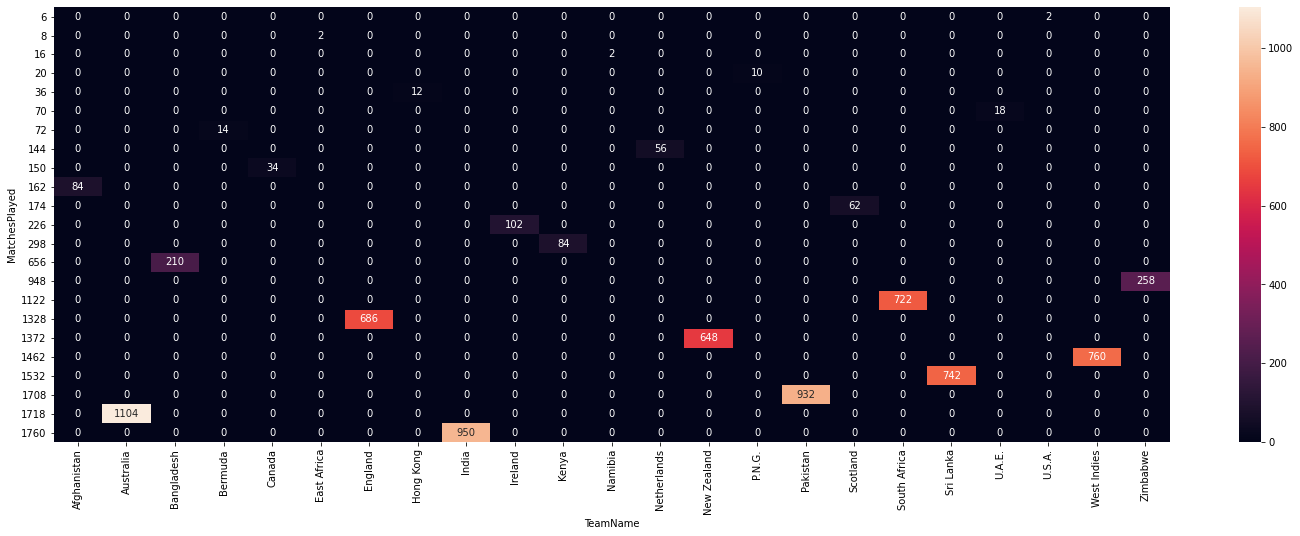

In [19]:
team_wise_matches_info_won_details  = pd.pivot_table(team_wise_matches_info,index=["MatchesPlayed"],columns="TeamName",values="MatchesWon",fill_value=0,aggfunc=sum)
plt.figure(figsize=(25,8))
sns.heatmap(team_wise_matches_info_won_details,annot=True,fmt=".0f")
plt.show()

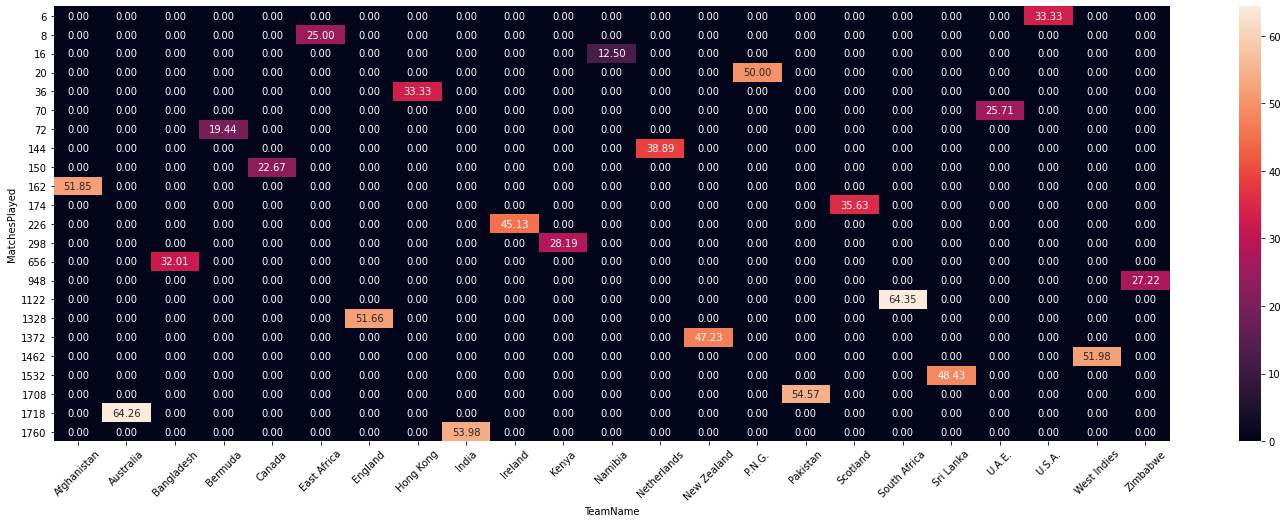

In [20]:
team_wise_matches_info_won_details  = pd.pivot_table(team_wise_matches_info,index=["MatchesPlayed"],columns="TeamName",values="WonPercentage",fill_value=0,aggfunc=sum)
plt.figure(figsize=(25,8))
sns.heatmap(team_wise_matches_info_won_details,annot=True,fmt="1.02f")
plt.xticks(rotation=45)
plt.show()

In [21]:
ground_wise_team_won_data = match_data[match_data["Host_Country"] == "India"].pivot_table(index="Ground",columns="Winner",values="Scorecard",fill_value=0,aggfunc="count")
ground_wise_team_won_data

Winner,Afghanistan,Australia,Bangladesh,Canada,East Africa,England,India,Ireland,Kenya,Namibia,New Zealand,Pakistan,South Africa,Sri Lanka,U.S.A.,West Indies,Zimbabwe
Ground,,,,,,,,,,,,,,,,,
Ahmedabad,0,6,0,0,0,4,14,0,0,0,4,2,4,4,0,10,0
Amritsar,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0
Bengaluru,0,8,0,0,0,4,26,2,0,0,0,2,0,0,0,0,0
Chandigarh,0,2,0,0,0,2,6,0,0,0,0,0,0,0,0,0,0
Chennai,0,8,0,0,0,4,14,0,2,0,2,4,0,0,0,2,0
Cuttack,0,2,0,0,0,6,24,0,0,0,2,0,0,2,0,0,0
Delhi,0,4,0,2,0,4,24,0,0,0,2,2,2,2,0,4,0
Dharamsala,0,0,0,0,0,2,4,0,0,0,0,0,0,0,0,0,0
Faridabad,0,2,0,0,0,0,4,0,0,0,0,0,4,0,0,4,2


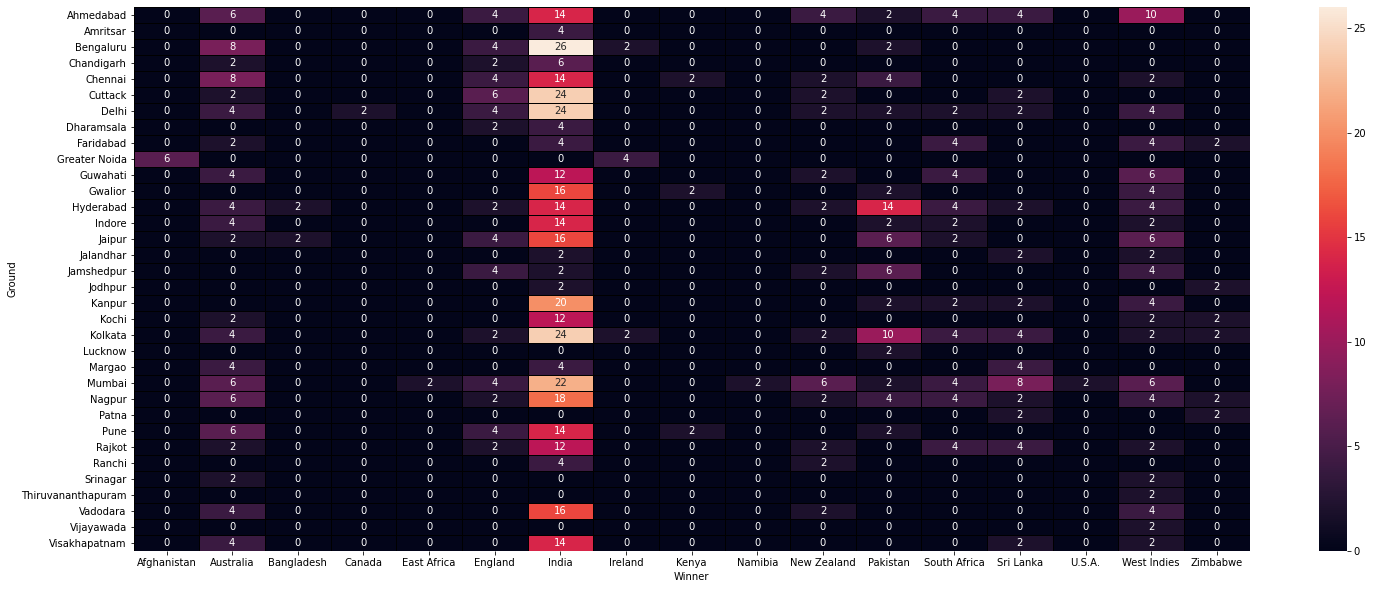

In [22]:
plt.figure(figsize=(25,10))
sns.heatmap(ground_wise_team_won_data,linecolor='black',linewidth=1,annot=True, fmt=".0f")
plt.show()

In [23]:
ground_wise_team_won_data = match_data.pivot_table(index="Ground",columns="Winner",values="Scorecard",fill_value=0,aggfunc="count")
ground_wise_team_won_data

Winner,Afghanistan,Australia,Bangladesh,Bermuda,Canada,East Africa,England,Hong Kong,India,Ireland,...,New Zealand,P.N.G.,Pakistan,Scotland,South Africa,Sri Lanka,U.A.E.,U.S.A.,West Indies,Zimbabwe
Ground,,,,,,,,,,,,,,,,,,,,,
Aberdeen,0,0,0,0,2,0,2,0,0,2,...,4,0,0,12,0,0,0,0,0,0
Abu Dhabi,0,6,0,0,0,0,6,2,2,0,...,8,2,32,2,6,4,4,0,0,0
Adelaide,0,68,2,0,0,0,8,0,16,0,...,18,0,8,0,8,10,0,0,22,0
Ahmedabad,0,6,0,0,0,0,4,0,14,0,...,4,0,2,0,4,4,0,0,10,0
Albion,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vijayawada,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
Visakhapatnam,0,4,0,0,0,0,0,0,14,0,...,0,0,0,0,0,2,0,0,2,0
Wellington,0,16,0,0,0,0,2,0,6,0,...,52,0,8,0,6,8,0,0,4,0


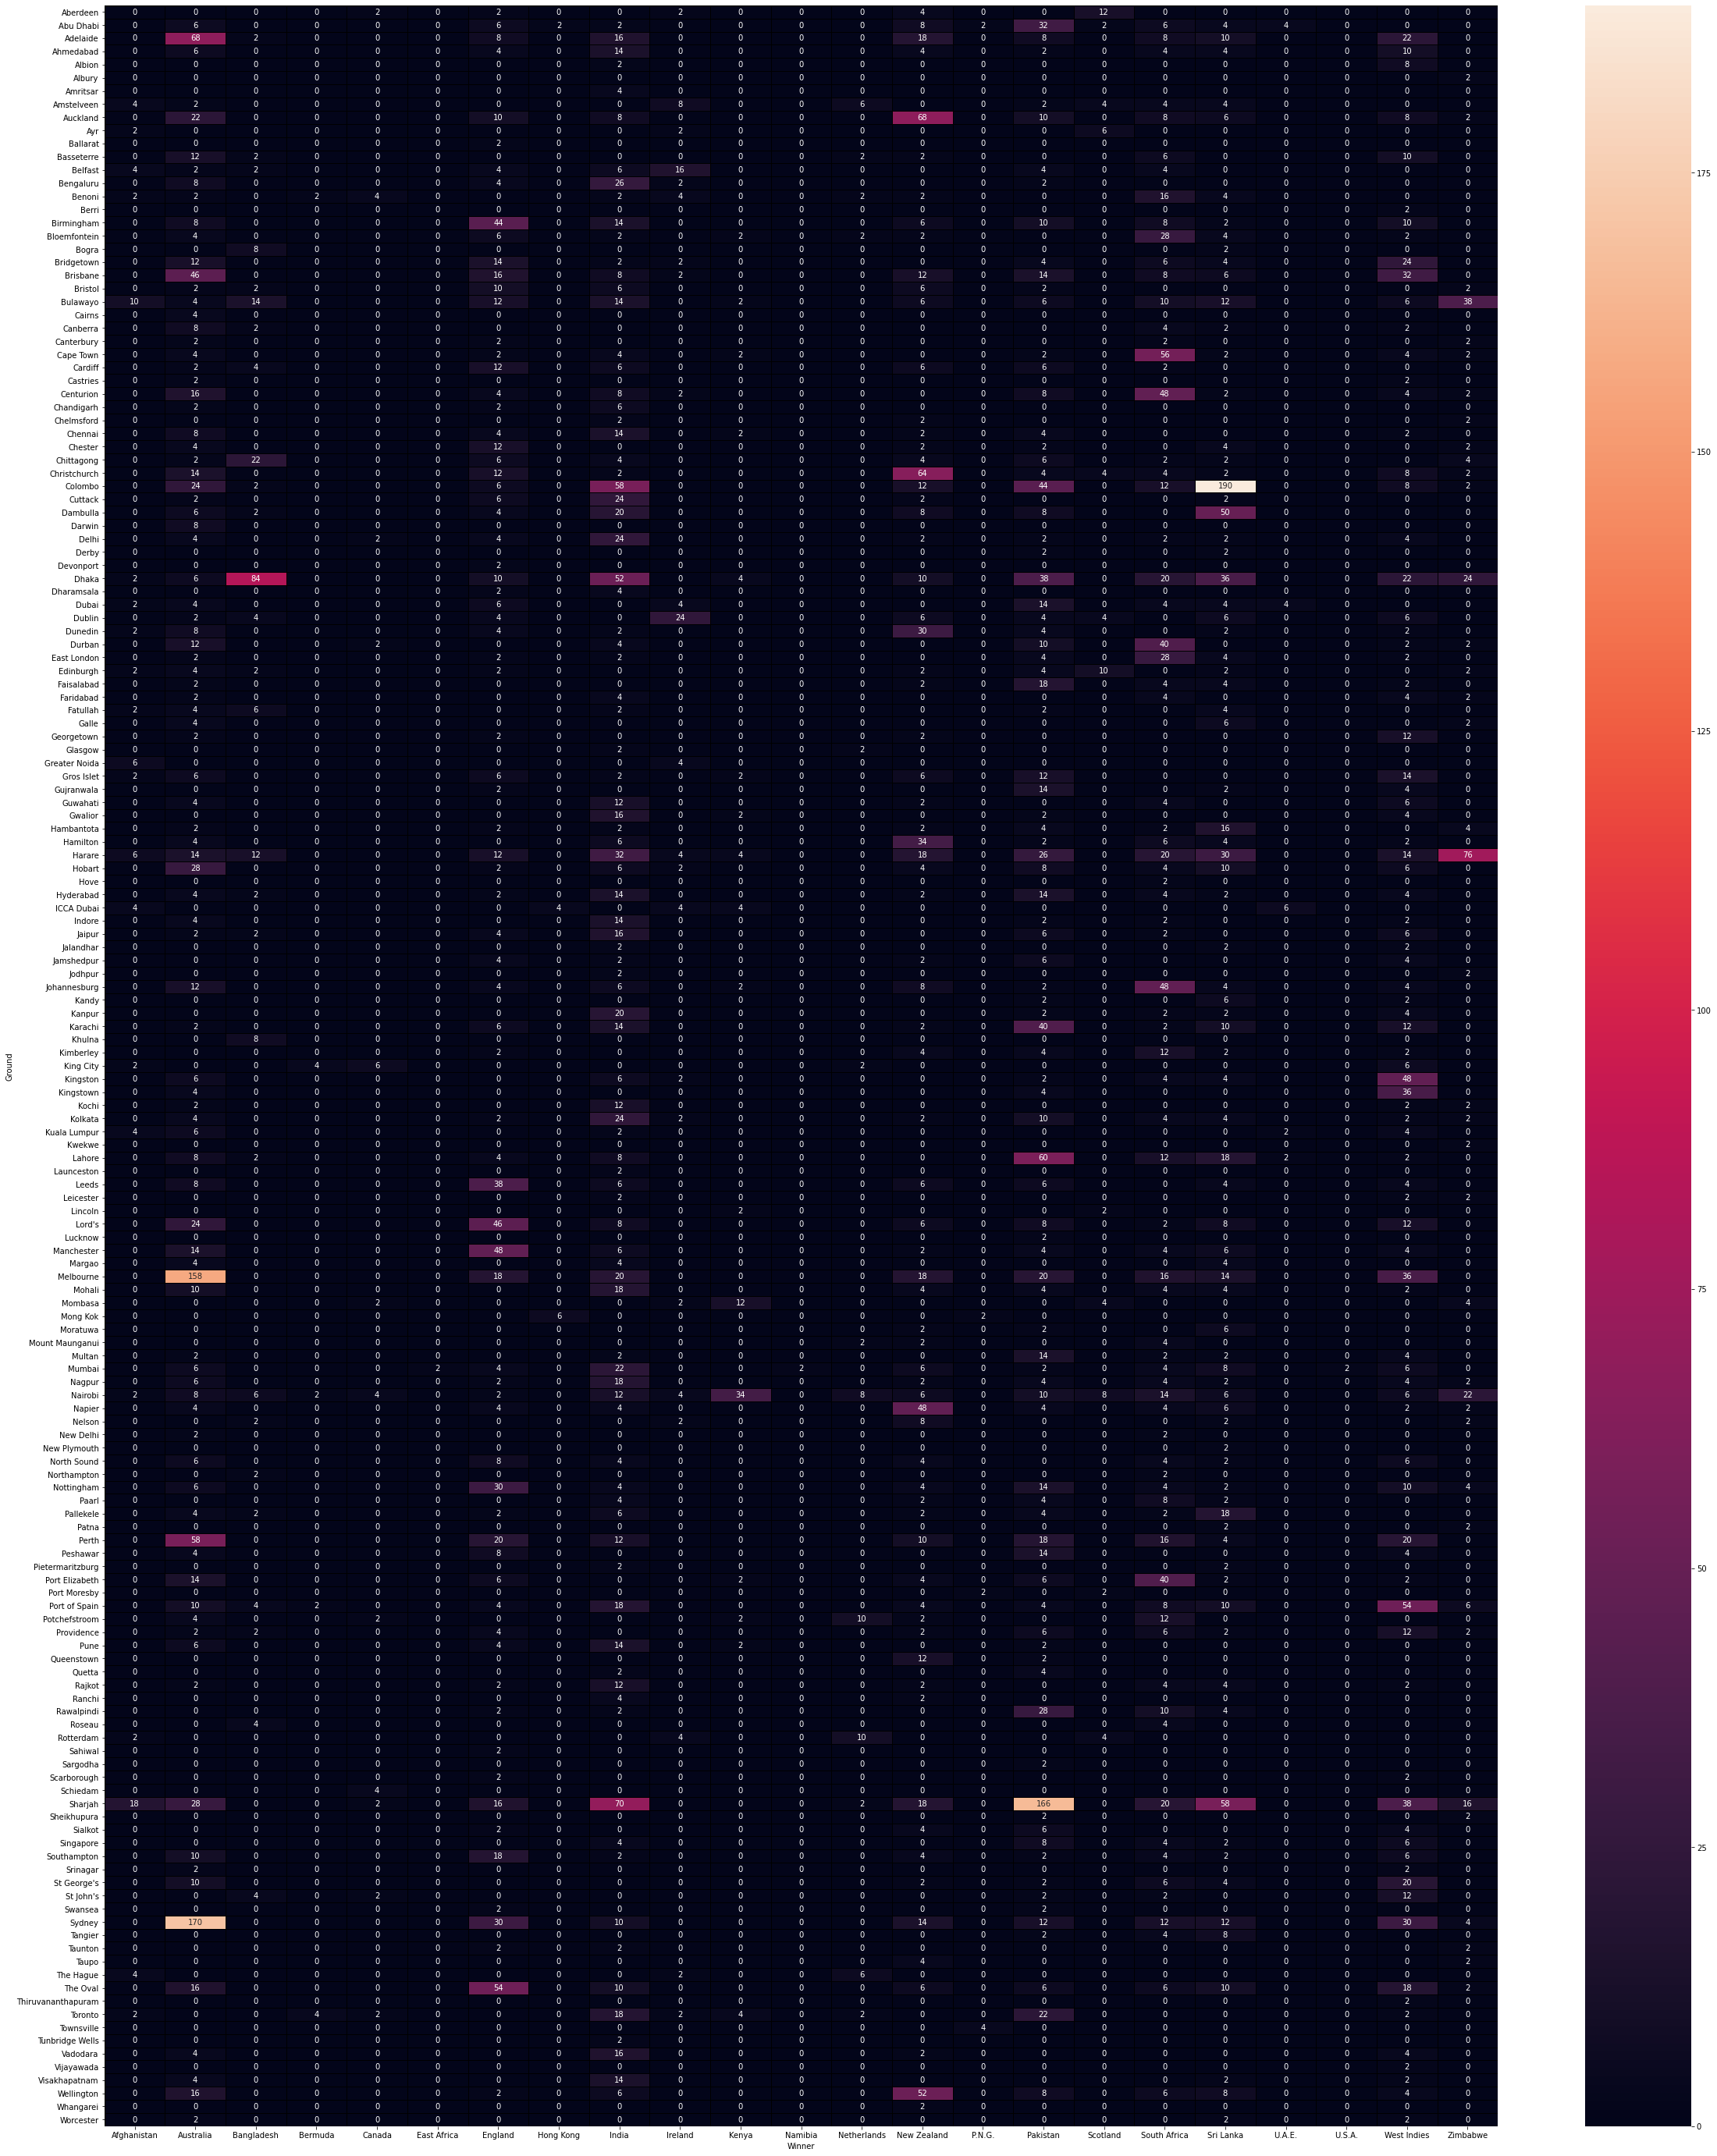

In [25]:
plt.figure(figsize=(40,50))
sns.heatmap(ground_wise_team_won_data,linecolor='black',linewidth=1,annot=True, fmt=".0f")
plt.show()

In [26]:
team_wise_matches_info.head()

,TeamName,MatchesPlayed,MatchesWon,WonPercentage,LossPercentage,Total_Home_Played,Total_Home_Wins,Home_Wins%,Home_Innings_1st_1st,Home_Innings_1st_2nd,Home_Innings_2nd_1st,Home_Innings_2nd_2nd,Total_Away_Played,Total_Away_Wins,Away_Wins%,Away_Innings_1st_1st,Away_Innings_1st_2nd,Away_Innings_2nd_1st,Away_Innings_2nd_2nd
5,India,1760,950,53.98,46.02,590,358,60.68,78,101,78,101,1170,592,50.6,132,164,132,164
0,Australia,1718,1104,64.26,35.74,818,548,66.99,159,115,159,115,900,556,61.78,150,128,150,128
4,Pakistan,1708,932,54.57,45.43,330,202,61.21,49,52,49,52,1378,730,52.98,202,163,202,163
6,Sri Lanka,1532,742,48.43,51.57,422,274,64.93,63,74,63,74,1110,468,42.16,128,106,128,106
3,West Indies,1462,760,51.98,48.02,460,258,56.09,50,79,50,79,1002,502,50.1,116,135,116,135


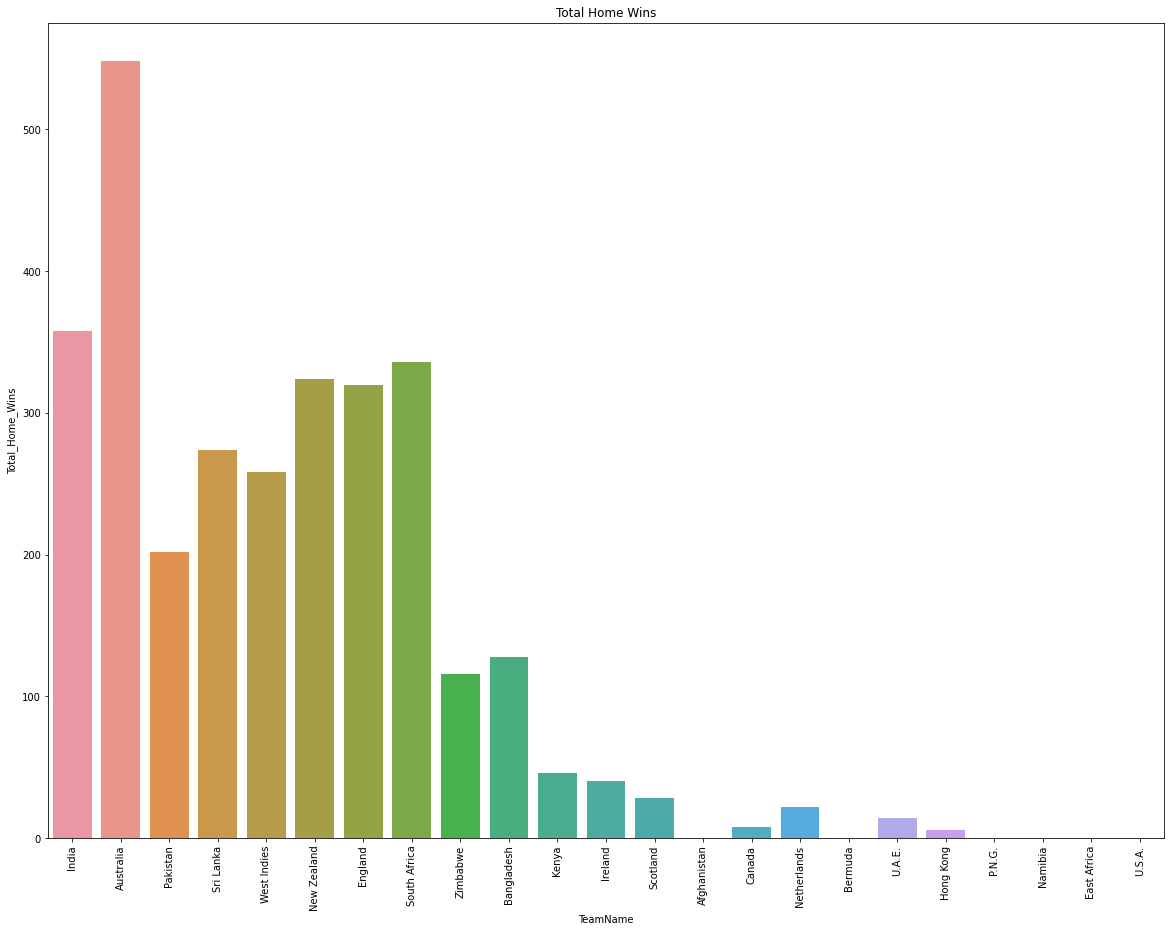

In [32]:
plt.figure(figsize=(20,15))
sns.barplot(x='TeamName',y='Total_Home_Wins',data=team_wise_matches_info)
plt.title("Total Home Wins")
plt.xticks(rotation=90)
plt.show()

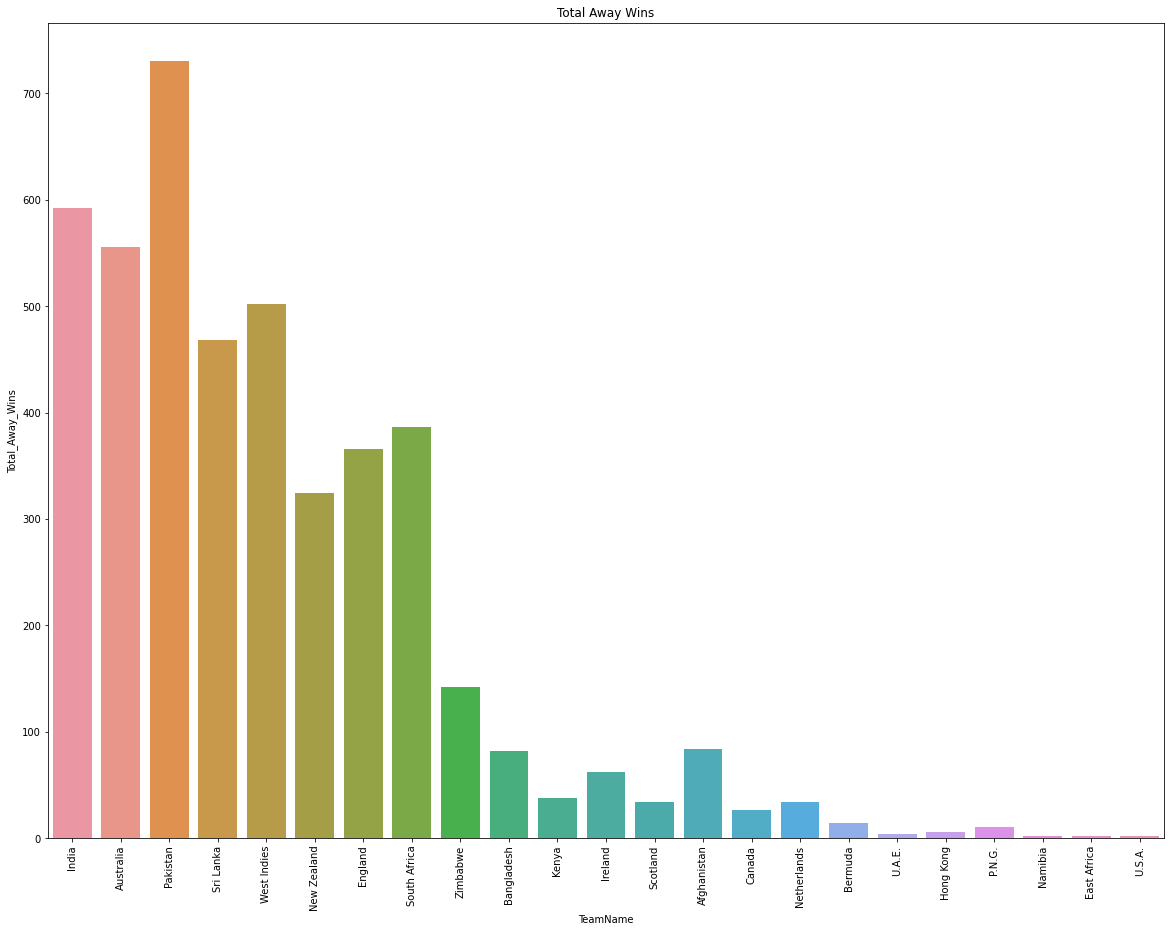

In [33]:
plt.figure(figsize=(20,15))
sns.barplot(x='TeamName',y='Total_Away_Wins',data=team_wise_matches_info)
plt.title("Total Away Wins")
plt.xticks(rotation=90)
plt.show()

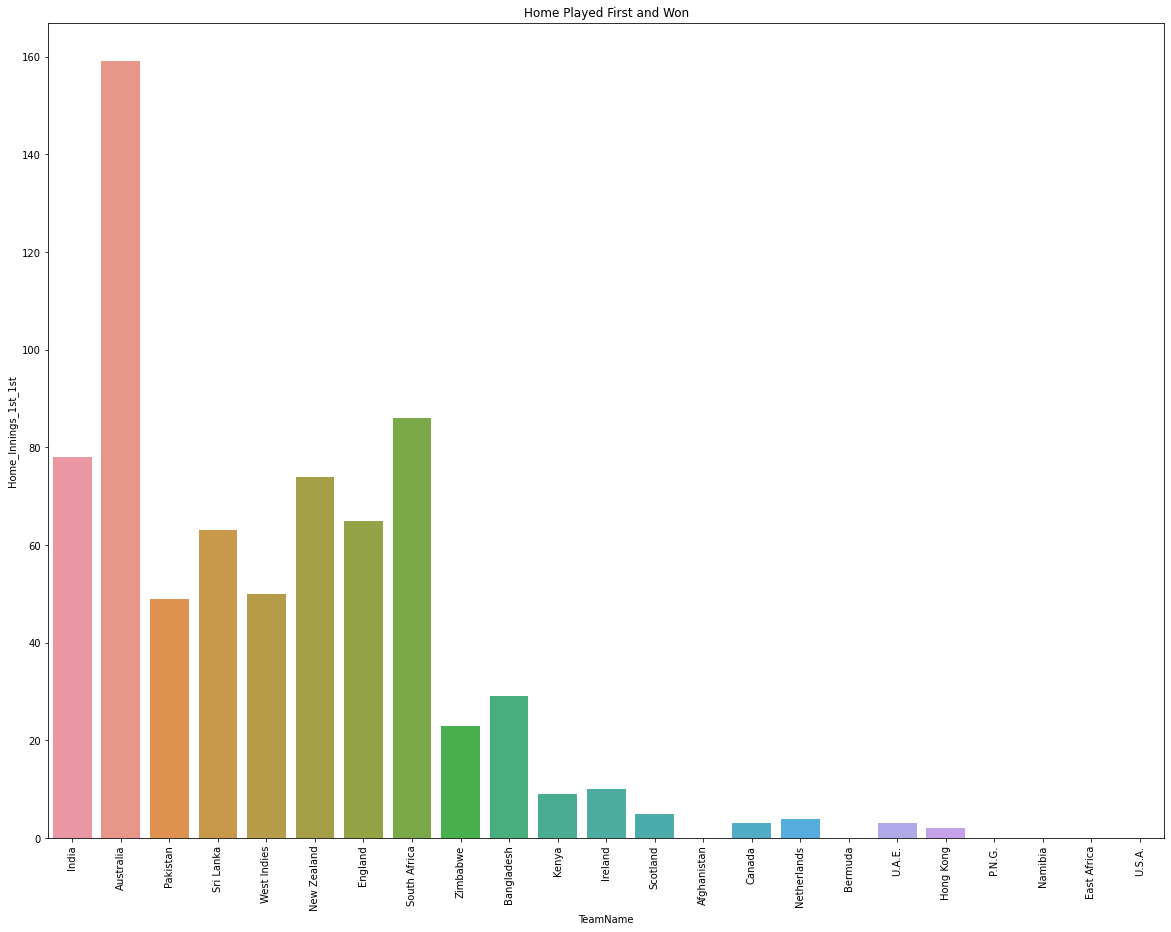

In [34]:
plt.figure(figsize=(20,15))
sns.barplot(x='TeamName',y='Home_Innings_1st_1st',data=team_wise_matches_info)
plt.title("Home Played First and Won")
plt.xticks(rotation=90)
plt.show()

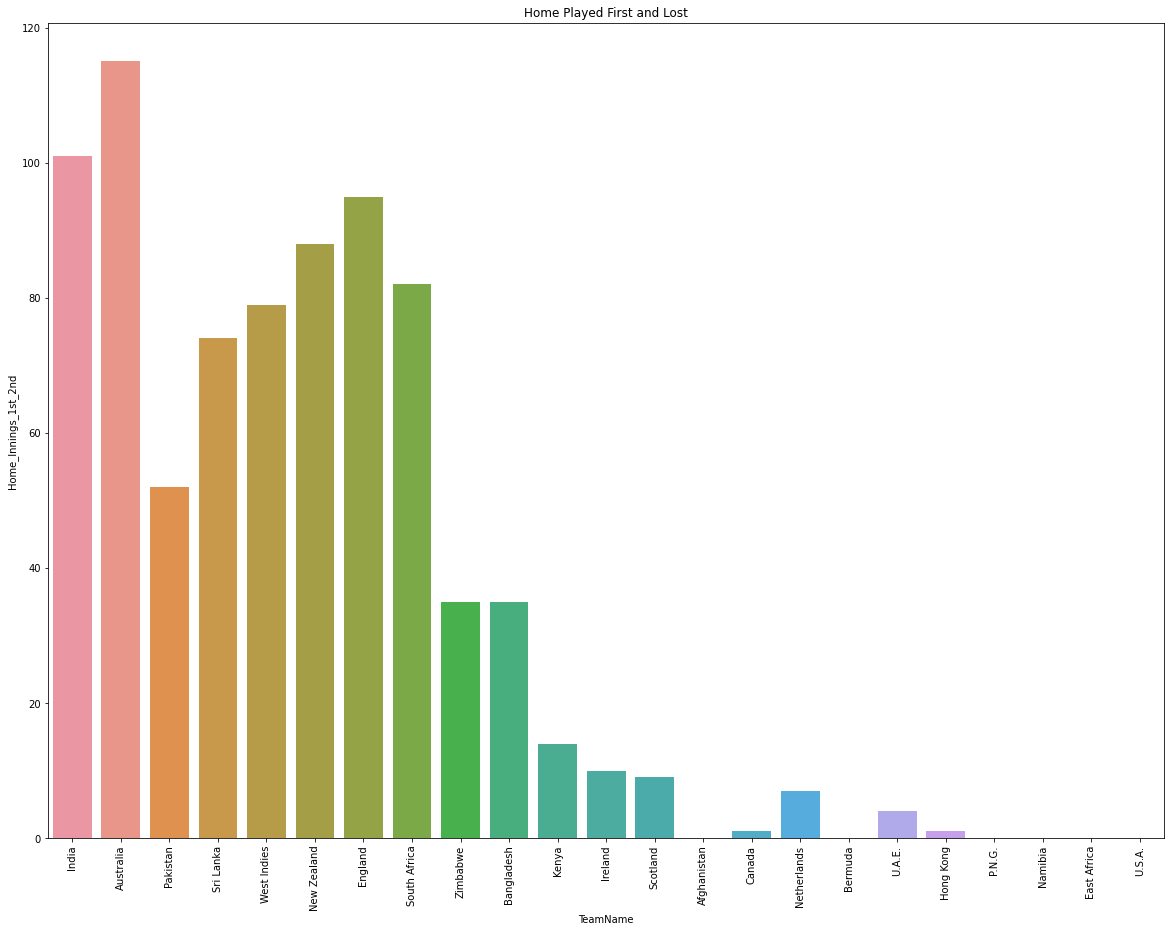

In [35]:
plt.figure(figsize=(20,15))
sns.barplot(x='TeamName',y='Home_Innings_1st_2nd',data=team_wise_matches_info)
plt.title("Home Played First and Lost")
plt.xticks(rotation=90)
plt.show()

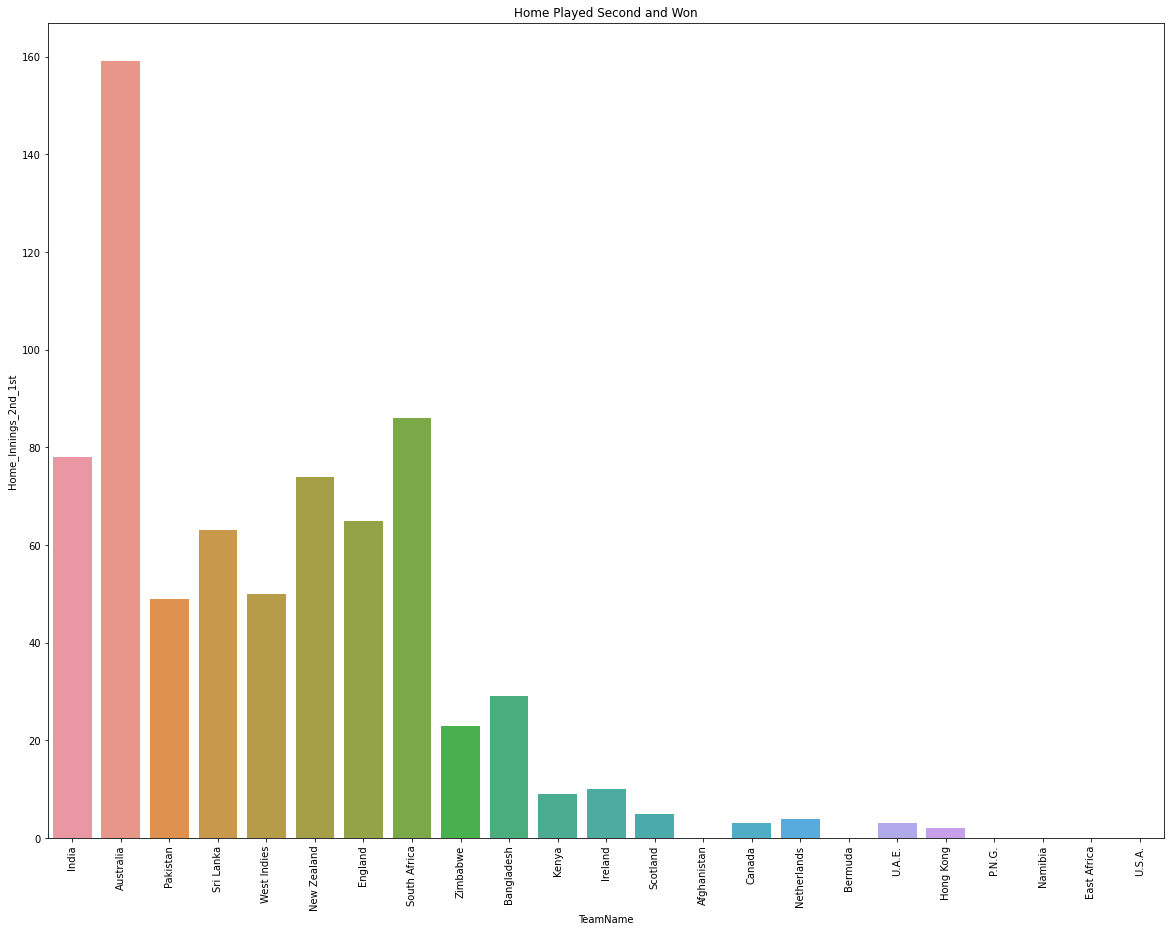

In [36]:
plt.figure(figsize=(20,15))
sns.barplot(x='TeamName',y='Home_Innings_2nd_1st',data=team_wise_matches_info)
plt.title("Home Played Second and Won")
plt.xticks(rotation=90)
plt.show()

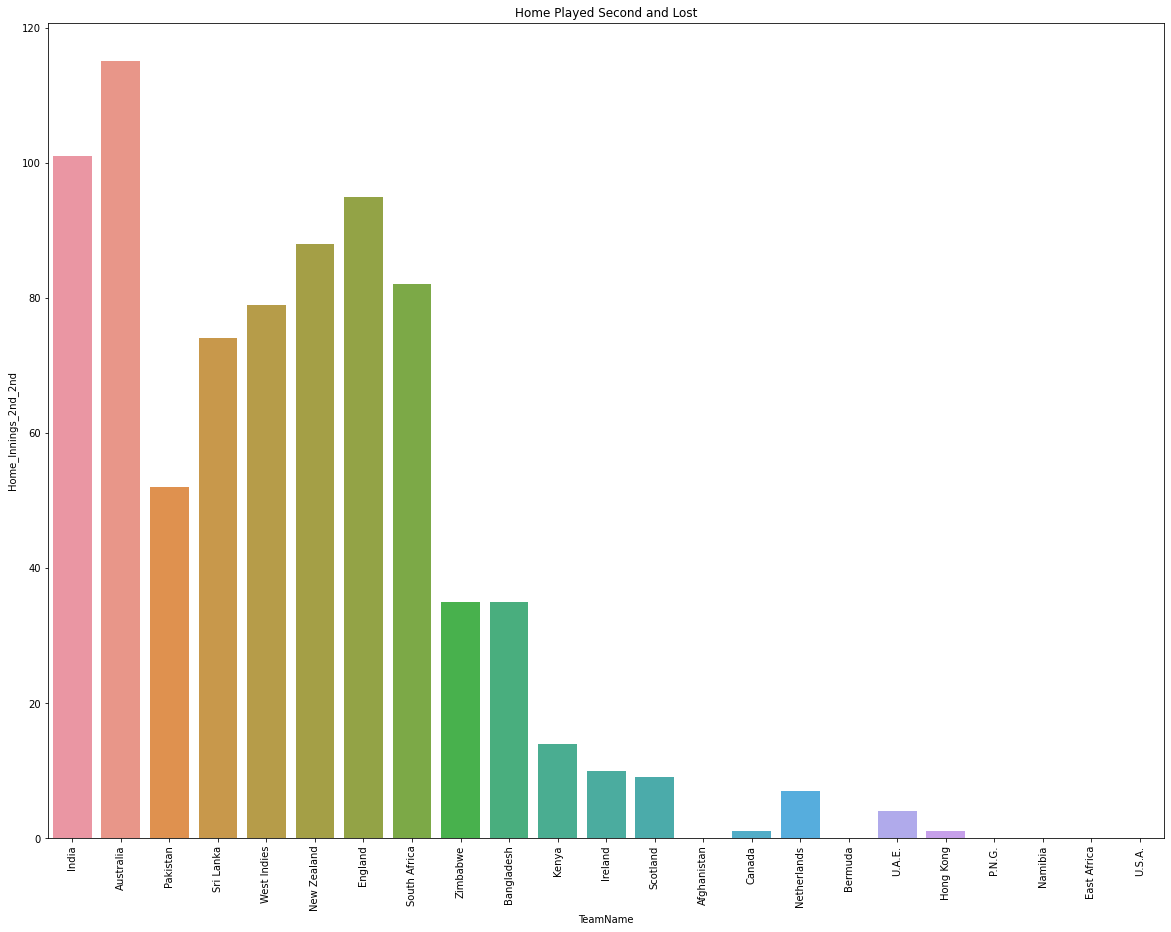

In [37]:
plt.figure(figsize=(20,15))
sns.barplot(x='TeamName',y='Home_Innings_2nd_2nd',data=team_wise_matches_info)
plt.title("Home Played Second and Lost")
plt.xticks(rotation=90)
plt.show()

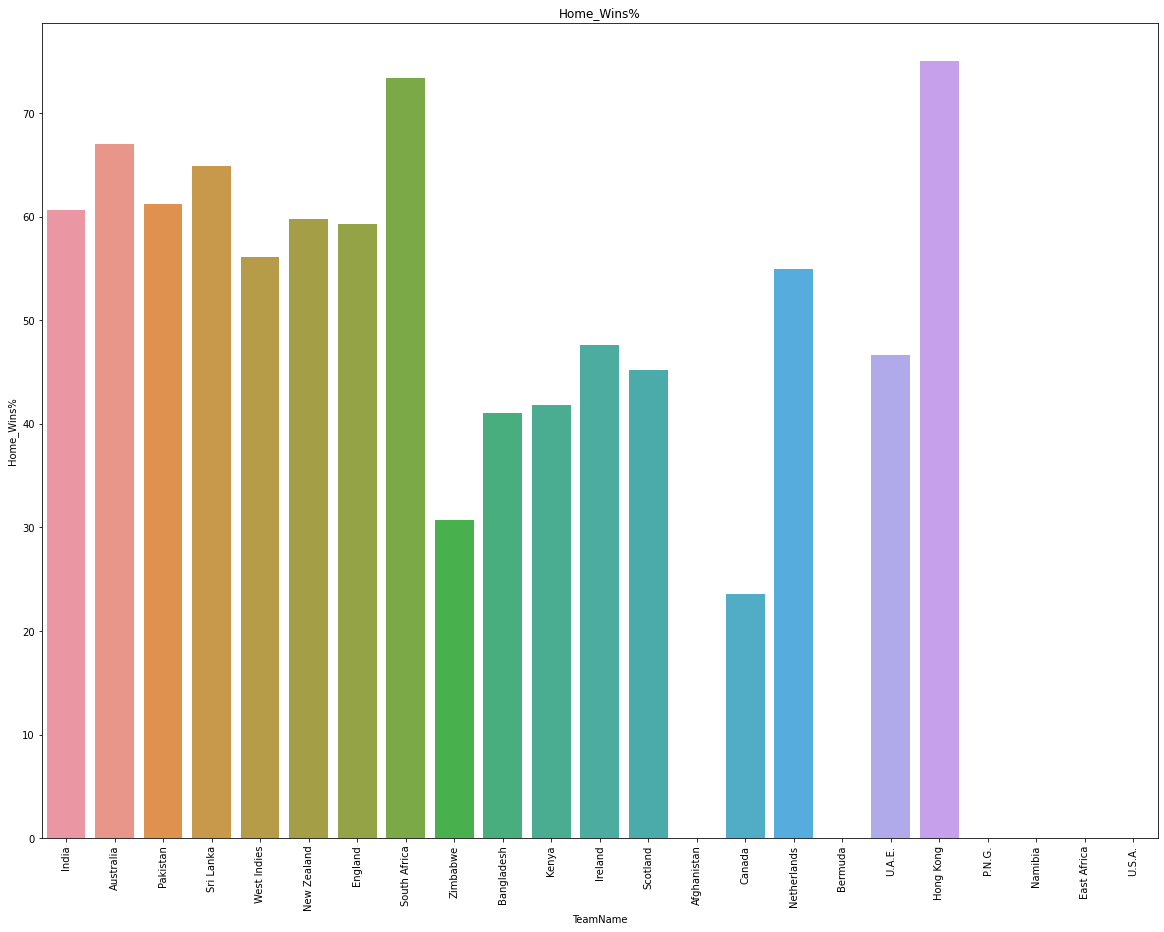

In [42]:
plt.figure(figsize=(20,15))
sns.barplot(x='TeamName',y='Home_Wins%',data=team_wise_matches_info)
plt.title("Home_Wins%")
plt.xticks(rotation=90)
plt.show()

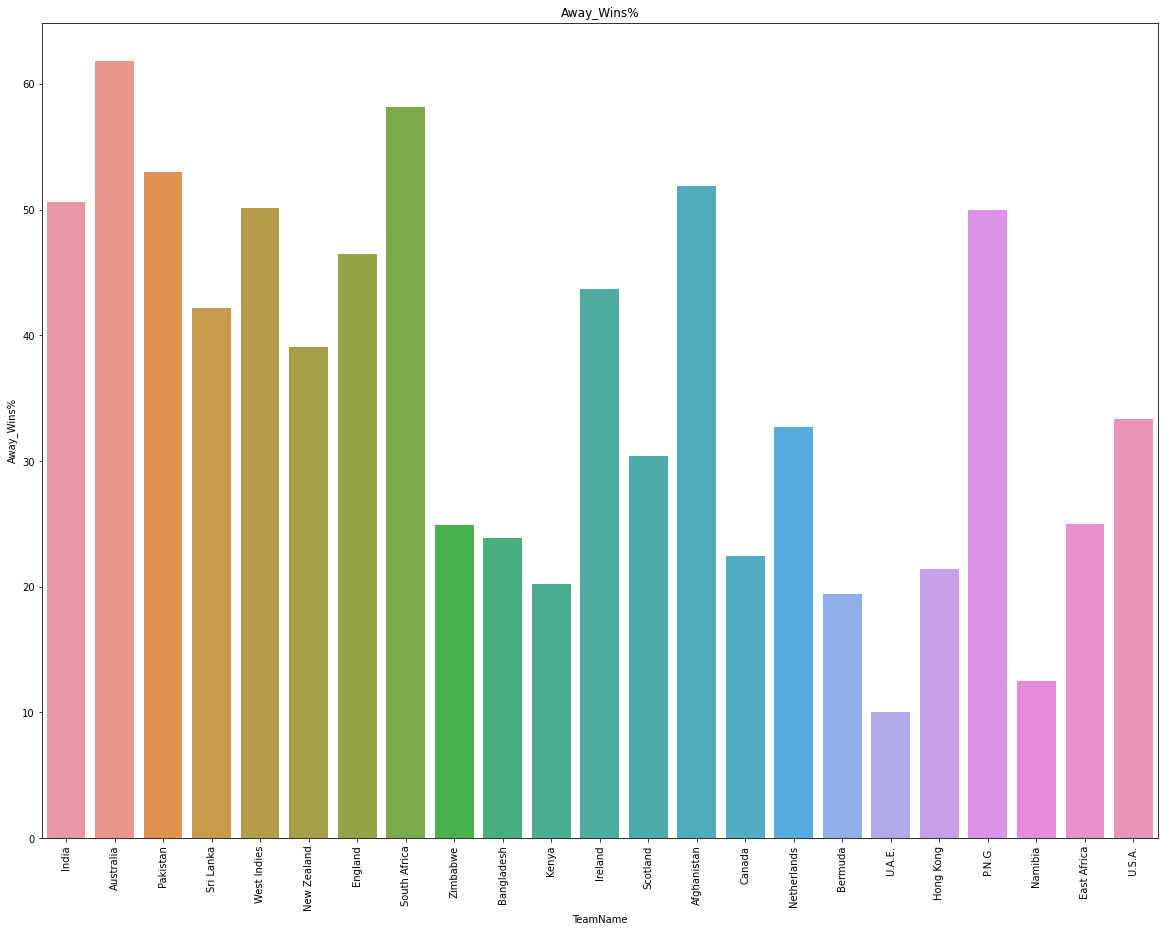

In [43]:
plt.figure(figsize=(20,15))
sns.barplot(x='TeamName',y='Away_Wins%',data=team_wise_matches_info)
plt.title("Away_Wins%")
plt.xticks(rotation=90)
plt.show()

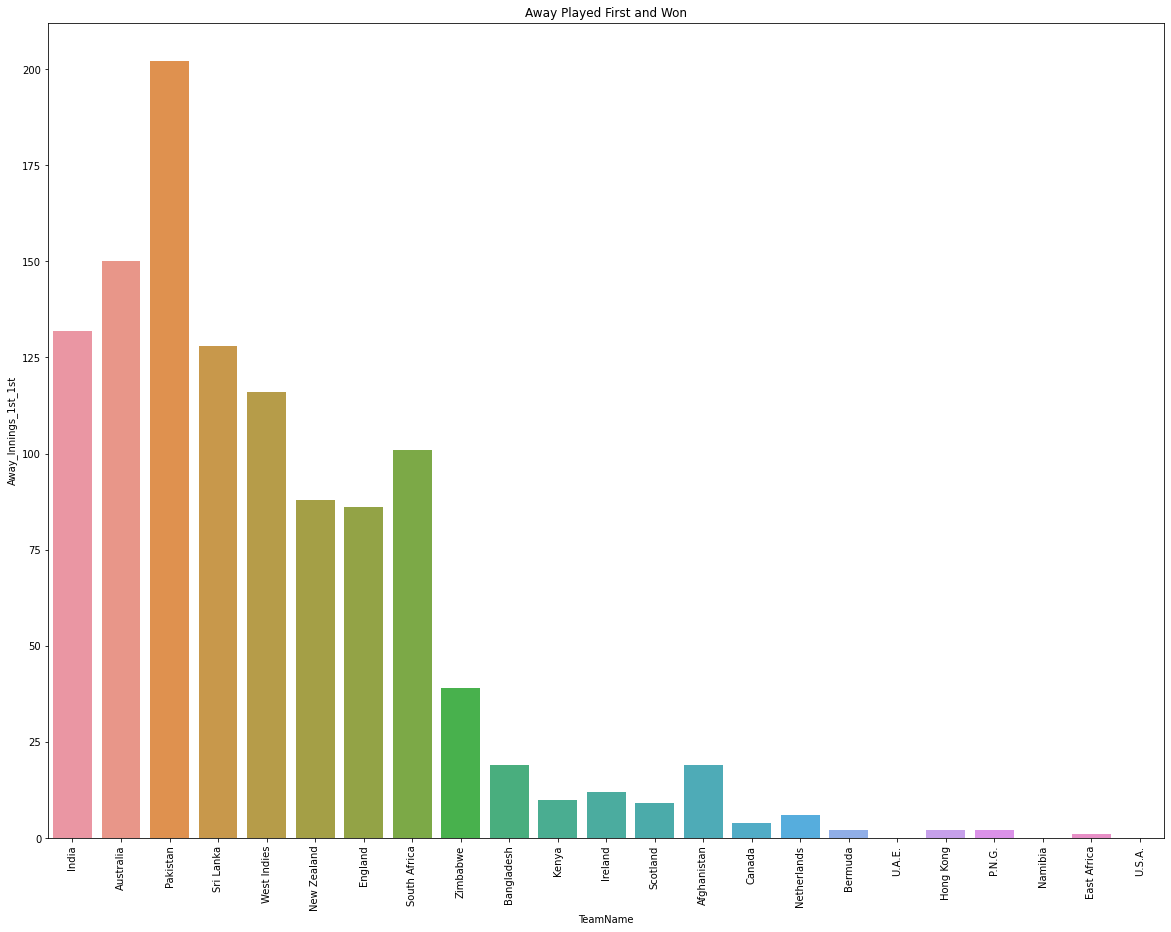

In [44]:
plt.figure(figsize=(20,15))
sns.barplot(x='TeamName',y='Away_Innings_1st_1st',data=team_wise_matches_info)
plt.title("Away Played First and Won")
plt.xticks(rotation=90)
plt.show()

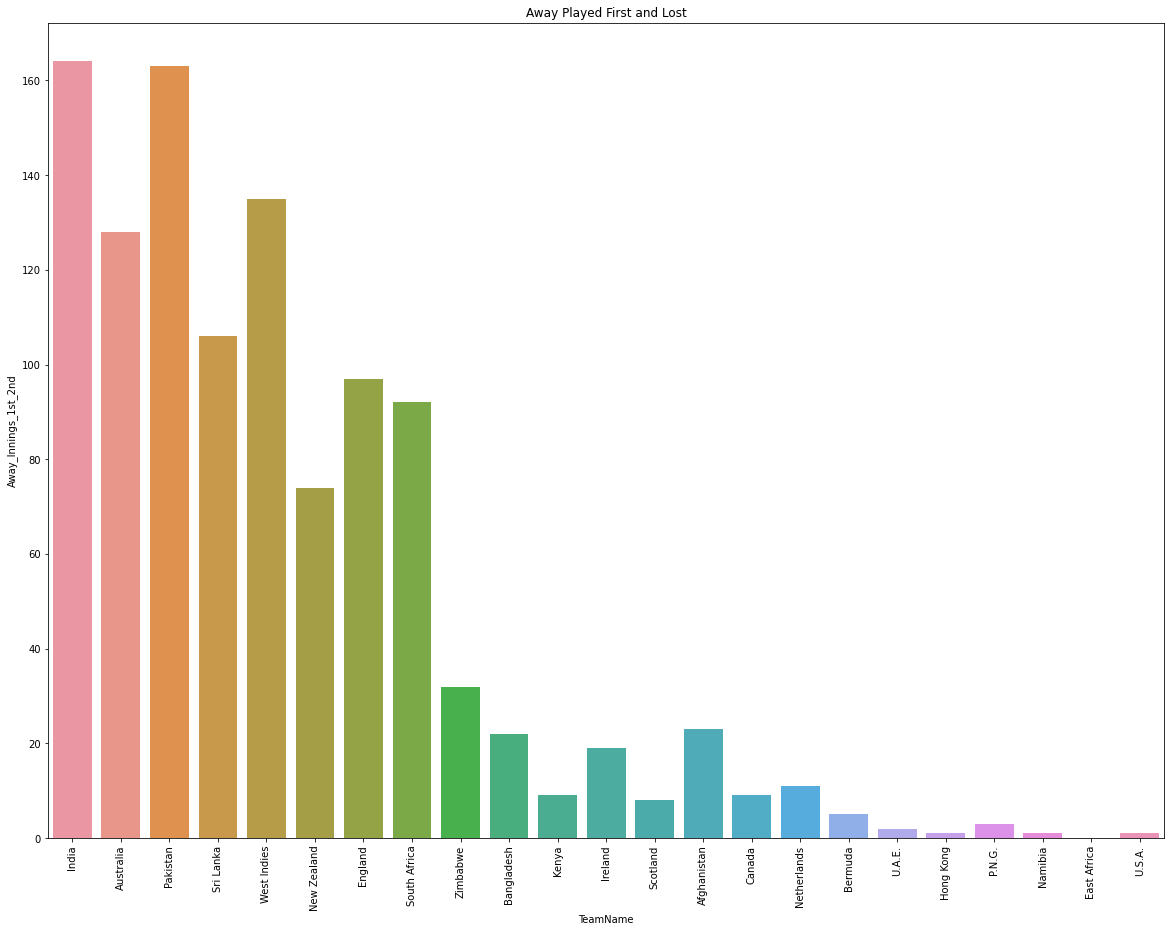

In [45]:
plt.figure(figsize=(20,15))
sns.barplot(x='TeamName',y='Away_Innings_1st_2nd',data=team_wise_matches_info)
plt.title("Away Played First and Lost")
plt.xticks(rotation=90)
plt.show()

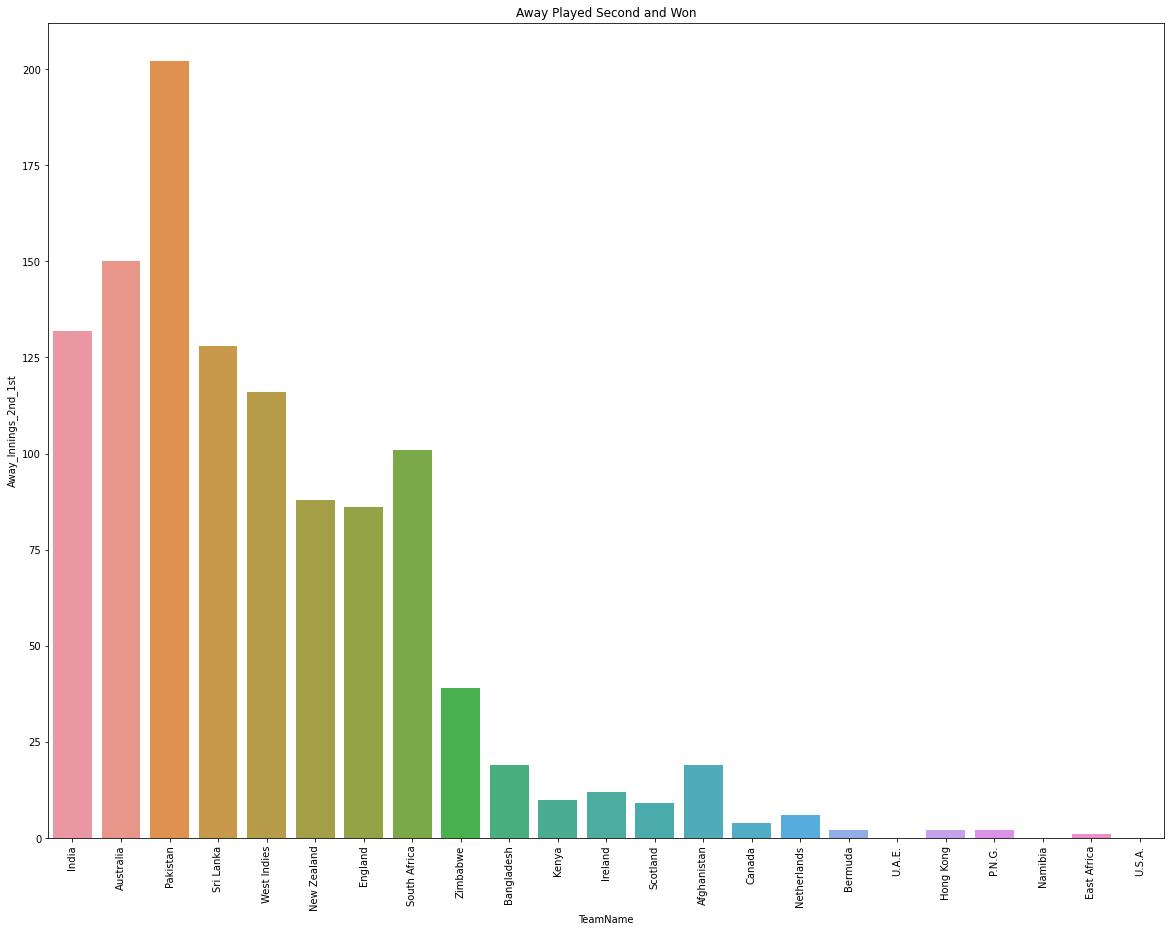

In [46]:
plt.figure(figsize=(20,15))
sns.barplot(x='TeamName',y='Away_Innings_2nd_1st',data=team_wise_matches_info)
plt.title("Away Played Second and Won")
plt.xticks(rotation=90)
plt.show()

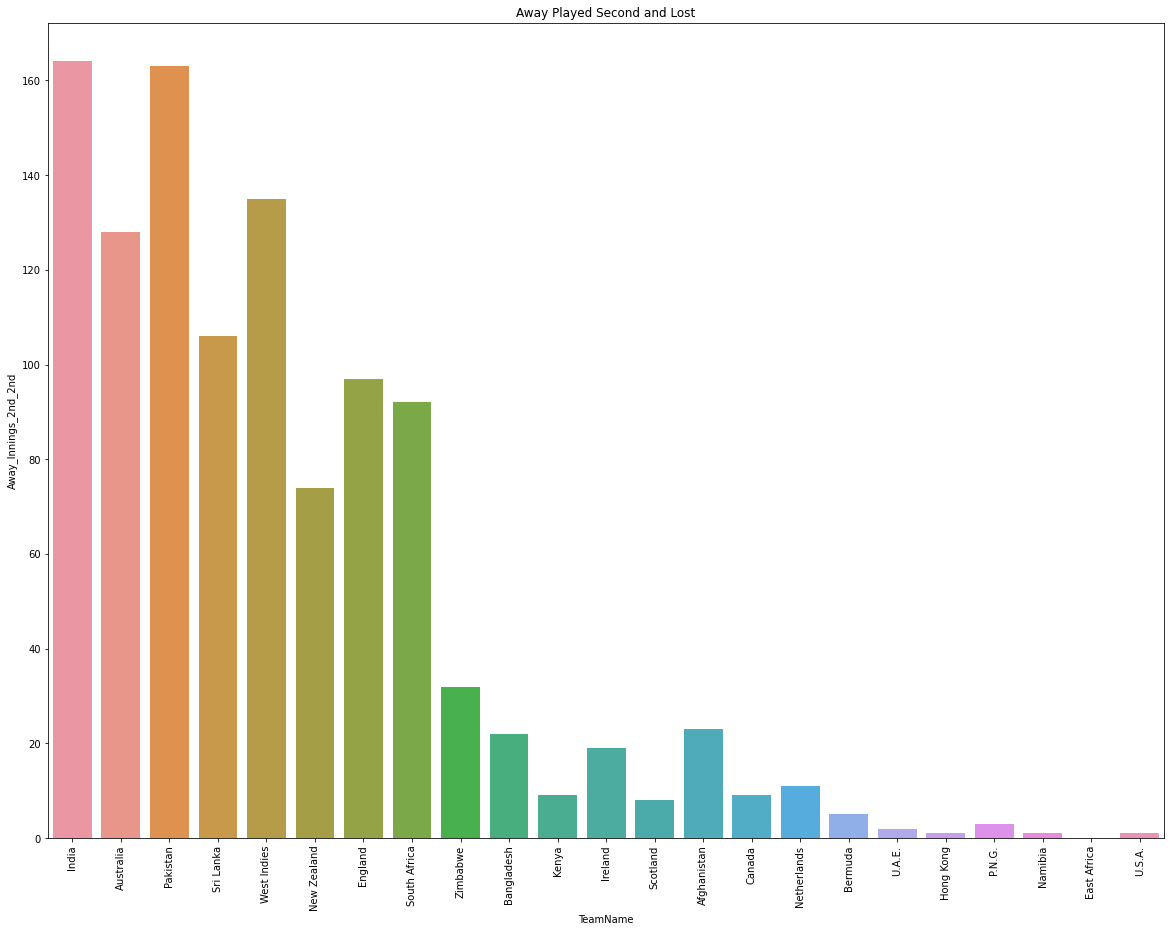

In [47]:
plt.figure(figsize=(20,15))
sns.barplot(x='TeamName',y='Away_Innings_2nd_2nd',data=team_wise_matches_info)
plt.title("Away Played Second and Lost")
plt.xticks(rotation=90)
plt.show()

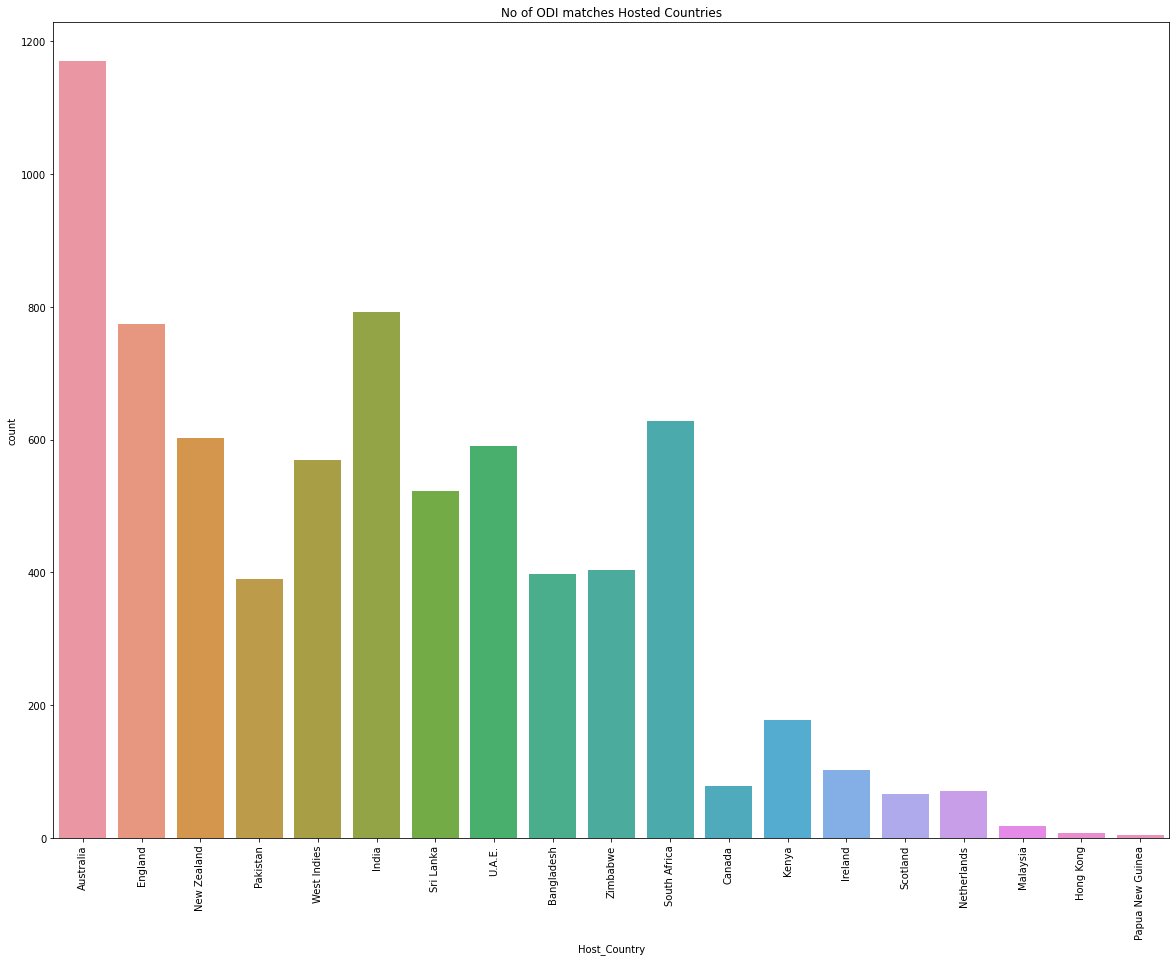

In [50]:
plt.figure(figsize=(20,15))
sns.countplot(x='Host_Country',data=match_data)
plt.title("No of ODI matches Hosted Countries")
plt.xticks(rotation=90)
plt.show()

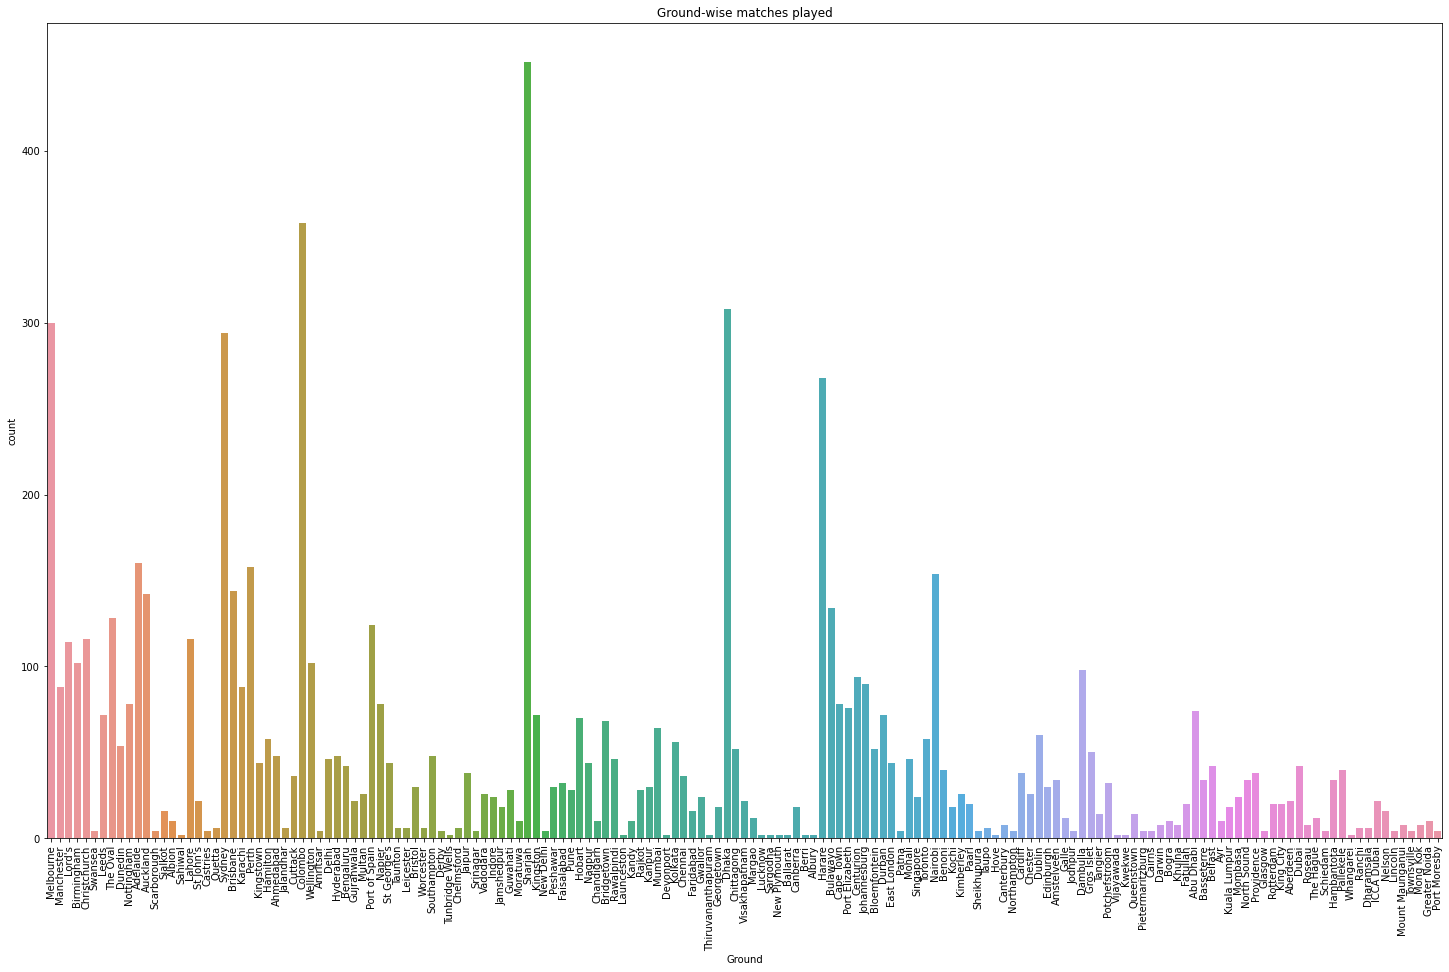

In [54]:
plt.figure(figsize=(25,15))
sns.countplot(x='Ground',data=match_data)
plt.title("Ground-wise matches played")
plt.xticks(rotation=90)
plt.show()

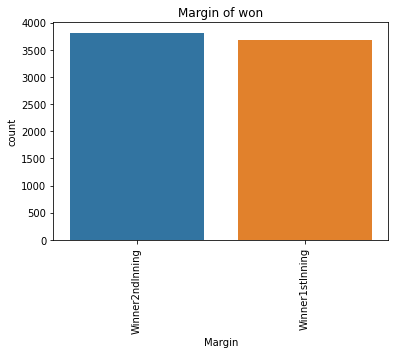

In [53]:
sns.countplot(x='Margin',data=match_data)
plt.title("Margin of won")
plt.xticks(rotation=90)
plt.show()